In [9]:
import torch
import matplotlib.pyplot as plt

In [5]:
#1. Простейшие операции над тензорами
a = torch.rand(3, 4)
b = torch.rand(12)

c = b.view(2, 2, 3)

first_column = a[:, 0]

print("Тензор a:\n", a)
print("\nТензор b:\n", b)
print("\nТензор c (2,2,3):\n", c)
print("\nПервый столбец a:\n", first_column)

Тензор a:
 tensor([[0.4682, 0.8821, 0.0380, 0.4337],
        [0.3942, 0.7412, 0.7852, 0.1335],
        [0.4189, 0.5639, 0.2832, 0.6211]])

Тензор b:
 tensor([0.1262, 0.7311, 0.6692, 0.7905, 0.3673, 0.5299, 0.1812, 0.2055, 0.7923,
        0.1755, 0.6765, 0.5643])

Тензор c (2,2,3):
 tensor([[[0.1262, 0.7311, 0.6692],
         [0.7905, 0.3673, 0.5299]],

        [[0.1812, 0.2055, 0.7923],
         [0.1755, 0.6765, 0.5643]]])

Первый столбец a:
 tensor([0.4682, 0.3942, 0.4189])


In [6]:
#2. Арифметические операции над тензорами
a = torch.rand(5, 2)
b = torch.rand(1, 10)

c = b.view(5, 2)

print("Сложение:\n", a + c)
print("\nРазность:\n", a - c)
print("\nПроизведение:\n", a * c)
print("\nДеление:\n", a / c)

Сложение:
 tensor([[1.2922, 0.9971],
        [1.2563, 1.2657],
        [1.4839, 0.6176],
        [0.8240, 1.6074],
        [1.4834, 0.9240]])

Разность:
 tensor([[-0.1662,  0.3743],
        [ 0.6703, -0.1287],
        [-0.2760, -0.4904],
        [-0.3096, -0.1807],
        [ 0.4063,  0.4575]])

Произведение:
 tensor([[0.4105, 0.2135],
        [0.2822, 0.3964],
        [0.5314, 0.0352],
        [0.1458, 0.6378],
        [0.5088, 0.1611]])

Деление:
 tensor([[0.7721, 2.2023],
        [3.2882, 0.8154],
        [0.6864, 0.1148],
        [0.4538, 0.7979],
        [1.7546, 2.9613]])


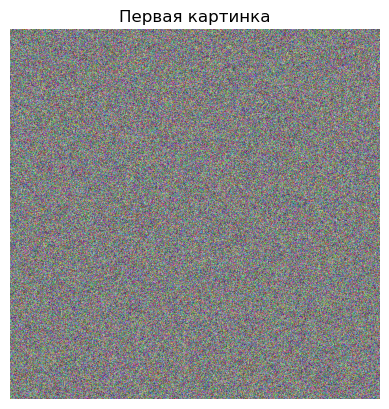

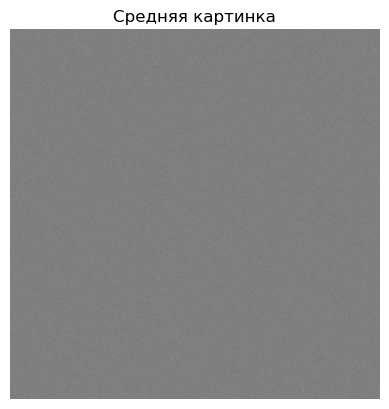

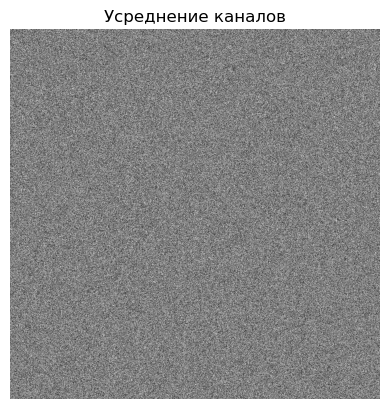

In [10]:
#3. Функции сравнения, агрегации
a = torch.rand(100, 780, 780, 3)

plt.imshow(a[0])
plt.title("Первая картинка")
plt.axis("off")
plt.show()

mean_image = a.mean(dim=0)
plt.imshow(mean_image)
plt.title("Средняя картинка")
plt.axis("off")
plt.show()

gray = a.mean(dim=3)
plt.imshow(gray[0], cmap='gray')
plt.title("Усреднение каналов")
plt.axis("off")
plt.show()

In [18]:
#4. Реализация функции прямого распространения
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def forward_pass(X, w):
    ones = torch.ones(X.shape[0], 1)
    X_ext = torch.cat([ones, X], dim=1)
    return sigmoid(X_ext @ w)

X = torch.rand(5, 3)
w = torch.rand(4)

y = forward_pass(X, w)
print("Выход нейрона:\n", y)

Выход нейрона:
 tensor([0.6198, 0.7071, 0.6633, 0.7010, 0.7326])


In [26]:
#5
a = torch.empty(2, 3, 4).uniform_()
b = torch.empty(1, 8, 3).uniform_()

c = b_gpu_view

a_cpu = a_gpu.cpu()
c_cpu = c.cpu().clone().detach().requires_grad_(True)

L = torch.mean((c_cpu - a_cpu) ** 2)
L.backward()

print("Градиент dL/dc:\n", c_cpu.grad)

c_tensor = c_cpu.detach()
print("Тип c:", type(c_tensor))

Градиент dL/dc:
 tensor([[[-0.0106,  0.0365, -0.0005, -0.0704],
         [ 0.0656,  0.0381, -0.0525, -0.0511],
         [ 0.0264,  0.0189, -0.0132,  0.0541]],

        [[-0.0229, -0.0188,  0.0048,  0.0135],
         [ 0.0175, -0.0723, -0.0330, -0.0174],
         [-0.0619,  0.0182, -0.0271, -0.0118]]])
Тип c: <class 'torch.Tensor'>
